<h1>House price prediction using Artificial Neural networkk</h1>
<hr>
<h2>Module one: Exploratory Data Analysis(EDA)</h2>
<p>In this work book we are focused on giving an analysis of the data and how different variables are correlated to each other in the dataset provided by Kenya Property Center(KPC).</p>
<p>The dataset being used for this project was provided by Kenya Property Company. The dataset contains listings of houses, event spaces and commercial propeties.</p>

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
#import dataset
df=pd.read_csv("project_files/kenya_listings.csv")

<h2>Basic information</h2>
<p>The dimensions of the dataset</p>

In [2]:
df.shape

(16117, 17)

In [41]:
df_cat = df.select_dtypes(include = "object")
numerical_features=df.loc[:, ~df.columns.isin(['id'])].dtypes[df.dtypes != 'object']
categorical_features = df.loc[:, ~df.columns.isin(['listdate', 'locality'])].dtypes[df.dtypes == 'object'].index
df_rental=df[df.category == 'For Rent']
df_sale=df[df.category=='For Sale']

</p>The following are the columns in the dataset with their corresponding data type</p>

In [6]:
df.dtypes

id                   int64
price              float64
price_qualifier     object
bedrooms             int64
bathrooms            int64
toilets            float64
furnished            int64
serviced             int64
shared               int64
parking              int64
category            object
type                object
sub_type            object
state               object
locality            object
sub_locality        object
listdate            object
dtype: object

In [7]:
df.isnull().sum()

id                     0
price                  3
price_qualifier     8870
bedrooms               0
bathrooms              0
toilets            10028
furnished              0
serviced               0
shared                 0
parking                0
category               0
type                   0
sub_type            9817
state                  0
locality               6
sub_locality       15071
listdate               0
dtype: int64

<h2>Example observations</h2>
<p>The following are the first 10 houses/properties in the dataset.<p>

In [8]:
df.head(10)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
0,1,5000.0,per month,3,0,NaN,0,0,0,0,For Rent,Apartment,NaN,Nairobi,Embakasi,Tassia,2020-07-18 00:00:00
1,2,12500000.0,NaN,4,3,NaN,0,0,0,0,For Sale,House,Detached Duplex,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
2,3,19500000.0,NaN,5,5,NaN,0,0,0,0,For Sale,House,Detached Duplex,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
3,4,19500000.0,NaN,4,0,NaN,0,0,0,4,For Sale,House,Detached Duplex,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
4,5,19500000.0,NaN,5,5,NaN,0,0,0,0,For Sale,House,Townhouse,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
5,6,19500000.0,NaN,5,0,NaN,0,0,0,5,For Sale,House,Townhouse,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
6,7,200000.0,per month,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,NaN,2020-07-18 00:00:00
7,8,100000.0,per month,3,3,3.0,0,0,0,0,For Rent,Apartment,NaN,Nairobi,Parklands,NaN,2020-07-18 00:00:00
8,9,9250000.0,NaN,3,2,NaN,0,0,0,0,For Sale,House,Detached Bungalow,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
9,10,120000.0,per month,3,3,3.0,0,0,0,0,For Rent,Apartment,NaN,Nairobi,Lavington,NaN,2020-07-18 00:00:00


<p>The following are the last ten properties in the dataset.</p>

In [9]:
df.tail(10)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
16107,16115,25000.0,per month,3,3,3.0,0,0,0,2,For Rent,House,Detached Bungalow,Nairobi,Embakasi,NaN,2022-06-16 13:02:20
16108,16116,5800000.0,NaN,4,4,4.0,0,0,0,4,For Sale,House,Detached Bungalow,Kajiado,Ongata Rongai,NaN,2022-06-16 13:08:35
16109,16117,18000.0,per month,2,2,2.0,0,0,0,2,For Rent,House,Semi-detached Bungalow,Nairobi,Thindigua,NaN,2022-06-16 13:19:41
16110,16118,16000.0,per month,2,2,2.0,0,0,0,2,For Rent,House,Semi-detached Bungalow,Kajiado,Ngong,NaN,2022-06-16 13:29:17
16111,16119,10000.0,per month,1,1,1.0,0,0,0,1,For Rent,House,Semi-detached Bungalow,Nairobi,Thindigua,NaN,2022-06-16 13:39:40
16112,16120,8000.0,per month,1,1,1.0,0,0,0,1,For Rent,House,Semi-detached Bungalow,Machakos,Machakos Central,NaN,2022-06-16 13:48:50
16113,16121,20000.0,per month,3,3,3.0,0,0,0,2,For Rent,House,Detached Bungalow,Kisii,Kisii Central,NaN,2022-06-16 13:57:43
16114,16122,10000.0,per month,1,1,1.0,0,0,0,1,For Rent,House,Semi-detached Bungalow,Nairobi,Kasarani,NaN,2022-06-16 14:07:00
16115,16123,6000000.0,NaN,3,3,3.0,0,0,0,4,For Sale,House,Detached Bungalow,Kajiado,Kitengela,NaN,2022-06-16 14:54:29
16116,16124,35000.0,NaN,4,4,4.0,0,0,0,4,For Rent,House,Detached Bungalow,Kajiado,Ongata Rongai,NaN,2022-06-16 16:31:24


<p>The following are the five most expensive rental properties in the dataset.</p>

In [10]:
df_rental.sort_values(by='price',ascending=False).head(5)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
6166,6167,1.500000e+09,per month,0,0,NaN,0,0,0,0,For Rent,Land,NaN,Nairobi,Nairobi Central,NaN,2020-08-19 22:23:04
15525,15533,5.000000e+08,per month,1,1,1.0,0,0,0,1,For Rent,House,NaN,Nakuru,London,NaN,2022-05-18 11:19:03
5298,5299,4.500000e+08,per month,0,0,NaN,0,0,0,0,For Rent,Commercial Property,Office Space,Nairobi,Kahawa West,NaN,2020-08-12 18:19:17
3903,3904,3.200000e+08,per month,0,0,NaN,0,0,0,0,For Rent,Commercial Property,NaN,Nairobi,Parklands,NaN,2020-07-31 01:06:38
3904,3905,3.000000e+08,per month,0,0,NaN,0,0,0,0,For Rent,Commercial Property,NaN,Nairobi,Westlands,NaN,2020-07-31 01:08:20


<p>The following are the most expensive properties listed for sale</p>

In [11]:
df_sale.sort_values(by='price',ascending=False).head()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
2174,2175,3.000000e+09,NaN,0,0,NaN,1,0,0,0,For Sale,Commercial Property,Hotel / Guest House,Kilifi,Malindi Town,NaN,2020-07-23 00:00:00
10145,10146,2.000000e+09,NaN,0,0,NaN,0,0,0,0,For Sale,Commercial Property,NaN,Nairobi,Nairobi Central,NaN,2021-09-27 02:43:10
10354,10355,1.600000e+09,NaN,0,0,NaN,0,0,0,0,For Sale,Commercial Property,NaN,Nairobi,Kileleshwa,NaN,2021-10-11 22:55:48
11302,11303,1.600000e+09,NaN,0,0,NaN,1,0,0,1000,For Sale,Commercial Property,Hotel / Guest House,Nairobi,Kileleshwa,NaN,2021-11-24 16:33:10
9708,9709,1.600000e+09,NaN,76,80,80.0,0,0,0,50,For Sale,Commercial Property,Hotel / Guest House,Nairobi,Kileleshwa,NaN,2021-09-08 01:07:15


<p>The five cheapest rental properties in the dataset are:</p>

In [12]:
# df_rental.df[df.category == 'For Rent']
df_rental.loc[(df_rental['price']!=0)].sort_values(by='price',ascending=False).tail()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
2624,2625,12.0,per month,0,0,NaN,0,0,0,0,For Rent,Apartment,NaN,Nairobi,Kahawa North,NaN,2020-07-24 16:18:42
659,660,10.0,per square meter / per month,0,0,NaN,0,0,0,0,For Rent,Commercial Property,Warehouse,Nairobi,Embakasi,NaN,2020-07-20 00:00:00
626,627,6.2,per square meter / per week,0,0,NaN,0,0,0,0,For Rent,Commercial Property,Warehouse,Mombasa,Likoni,NaN,2020-07-20 00:00:00
8416,8417,1.0,per month,0,0,NaN,0,0,0,0,For Rent,Land,NaN,Nairobi,Umoja,NaN,2021-04-19 17:02:26
8850,8851,1.0,per month,0,0,2.0,0,0,0,2,For Rent,Commercial Property,Office Space,Nairobi,Kilimani,NaN,2021-06-24 14:26:23


<p>The five cheapest properties that were listed for sale are:</p>

In [16]:
# replace null values with zero since there are rows with null
df.fillna({'price':0},  inplace=True)
df_sale.loc[(df_sale['price']!=0)].sort_values(by='price',ascending=False).tail()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
1368,1369,34.90,NaN,4,0,NaN,0,0,0,0,For Sale,Apartment,NaN,Nairobi,Kileleshwa,NaN,2020-07-21 00:00:00
1365,1366,17.40,NaN,2,0,NaN,0,0,0,0,For Sale,Apartment,NaN,Nairobi,Kileleshwa,NaN,2020-07-21 00:00:00
1395,1396,14.50,NaN,2,2,NaN,0,0,0,0,For Sale,Apartment,NaN,Nairobi,Westlands,NaN,2020-07-21 00:00:00
484,485,14.50,NaN,2,2,NaN,0,0,0,0,For Sale,Apartment,NaN,Mombasa,Likoni,NaN,2020-07-19 00:00:00
7179,7180,7.75,NaN,0,0,NaN,0,0,0,0,For Sale,Apartment,NaN,Kiambu,Kikuyu,NaN,2020-08-26 01:26:59


<h2>Univariate analysis</h2>
<p></p>
<h2>Distribution of categorical feautures</h2>

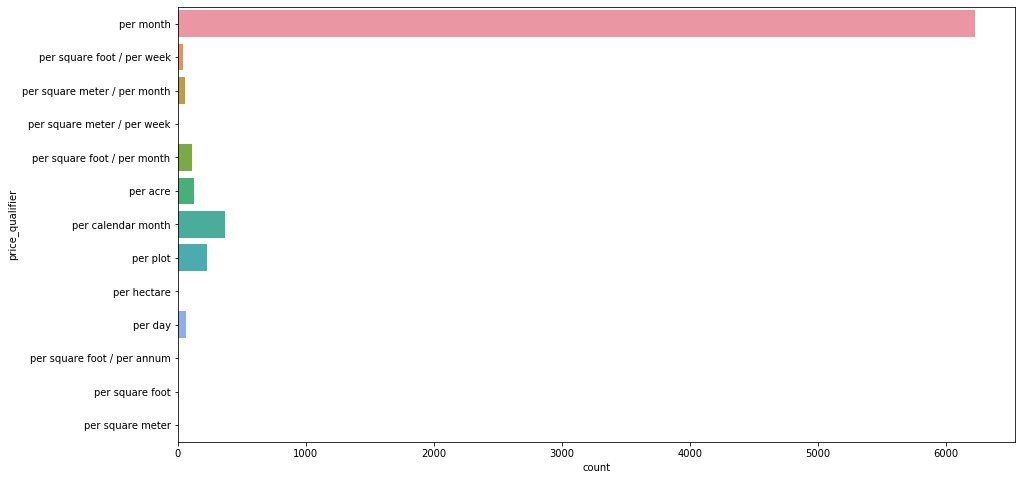

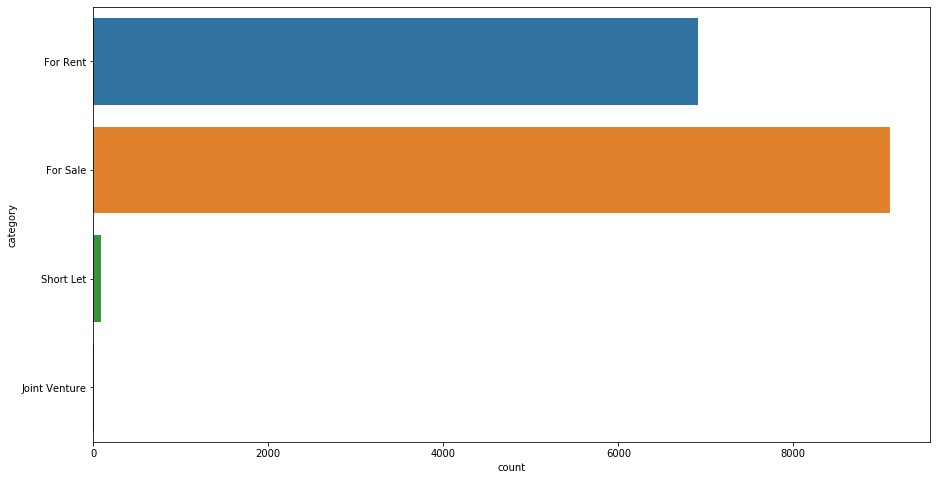

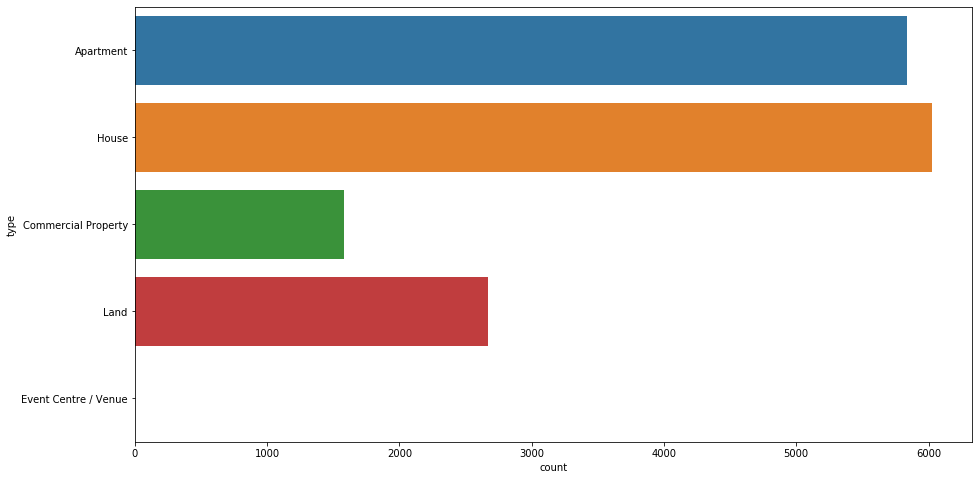

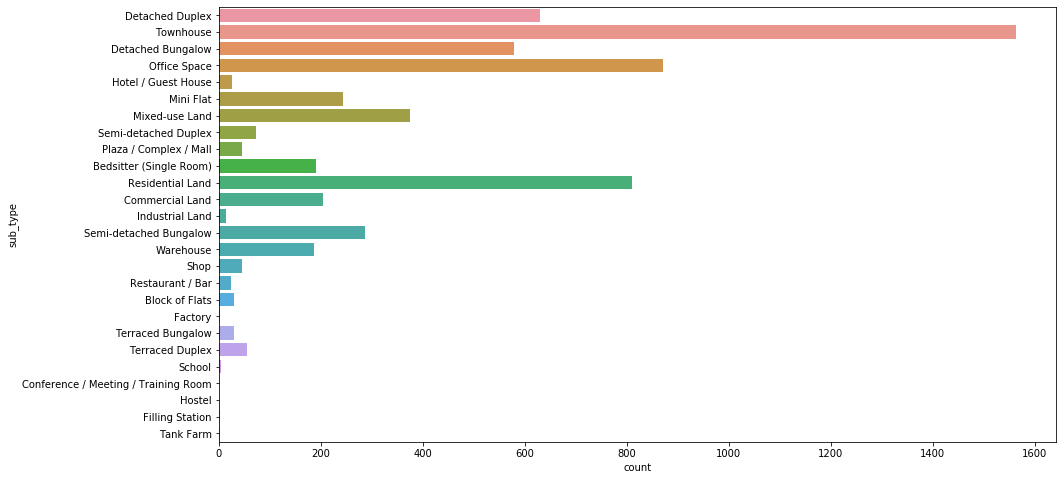

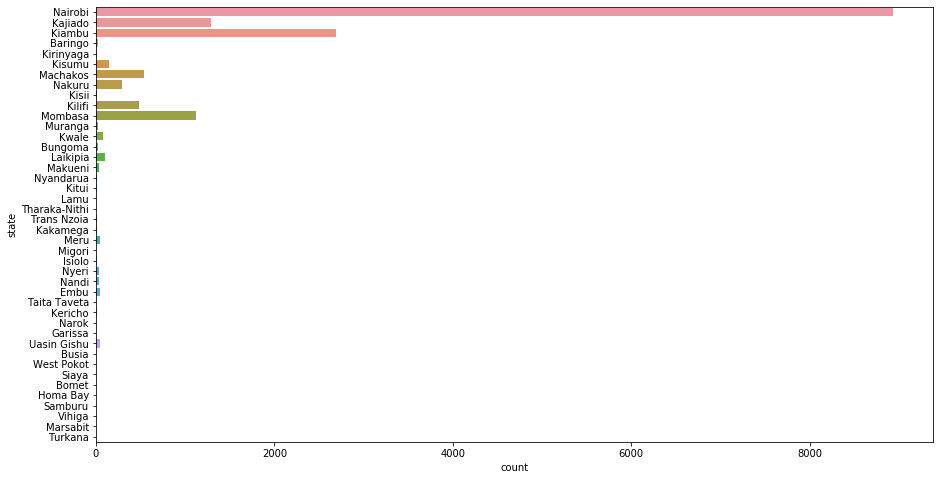

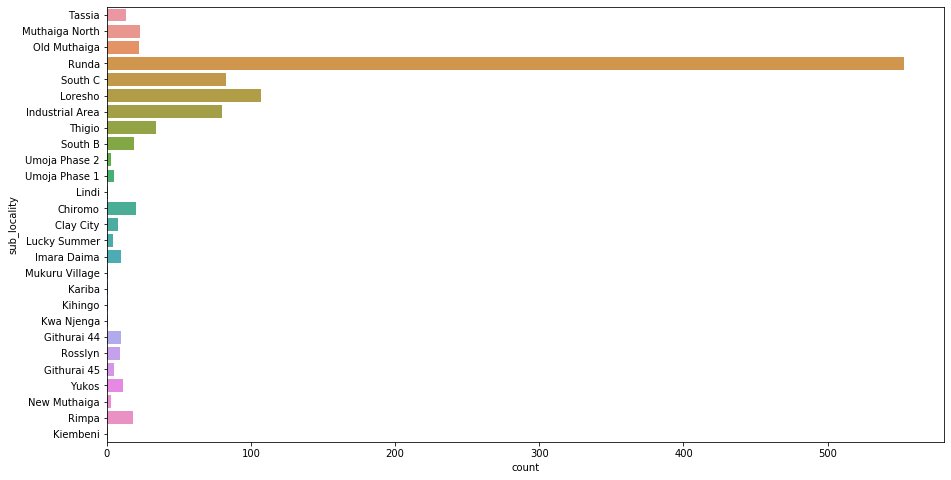

In [17]:
# Plot bar plot for each categorical feature
for feature in categorical_features:
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.countplot(y=feature ,data=df,ax=ax)
    plt.show()

<p>Summary statistics of categorical features</p>

In [18]:
df_cat.describe()

,price_qualifier,category,type,sub_type,state,locality,sub_locality,listdate
count,7247,16117,16117,6300,16117,16111,1046,16117
unique,13,4,5,26,42,357,27,13783
top,per month,For Sale,House,Townhouse,Nairobi,Westlands,Runda,2020-07-22 00:00:00
freq,6227,9108,6026,1563,8935,2446,553,426


<h2>Distribution of numerical features</h2>

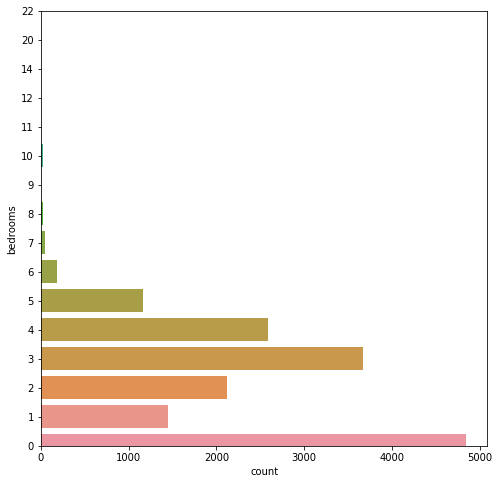

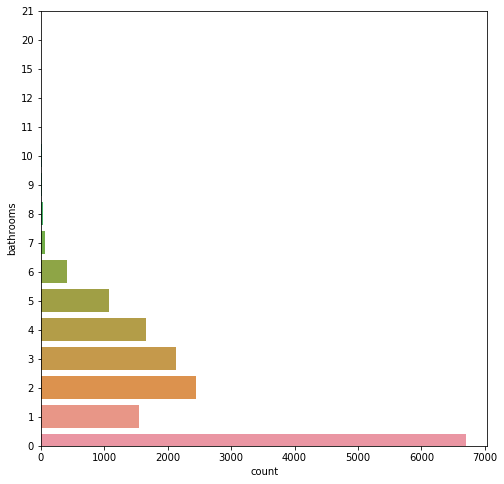

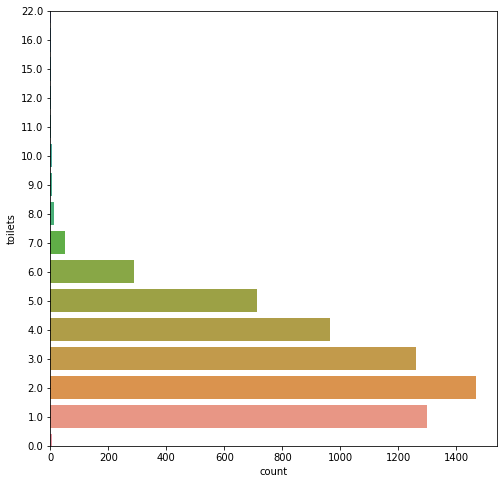

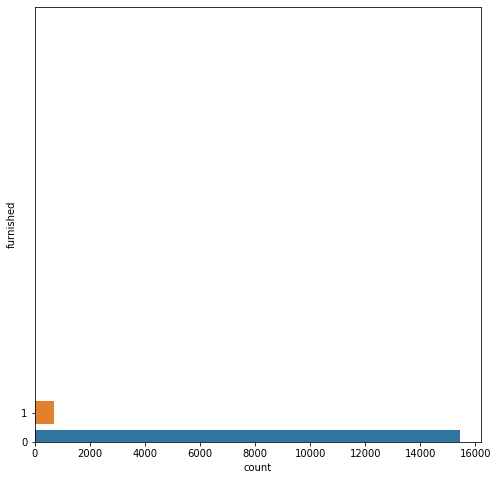

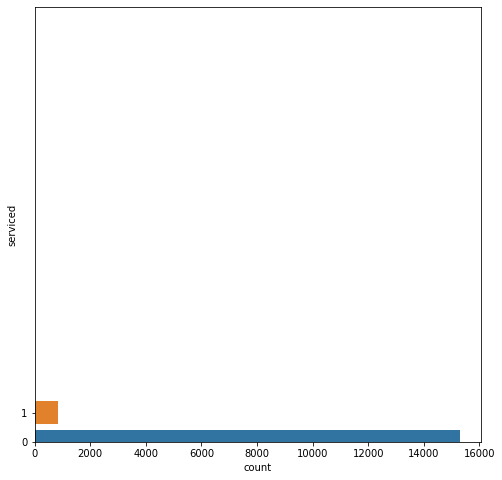

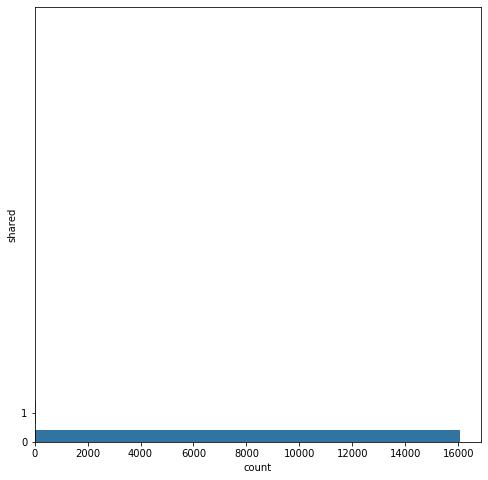

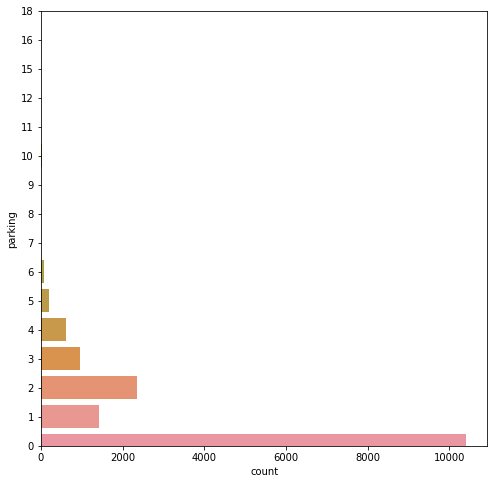

In [19]:
df_num = df.loc[:, ~df.columns.isin(['id', 'price'])].select_dtypes(include = np.number)
for feature in df_num:
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.countplot(y=feature ,data=df,ax=ax)
    ax.set_ylim(0,15)
    plt.show()

<h3>Disp plot for rental values</h3>
<p>Distplot are used to show the denstity distribution</p> 

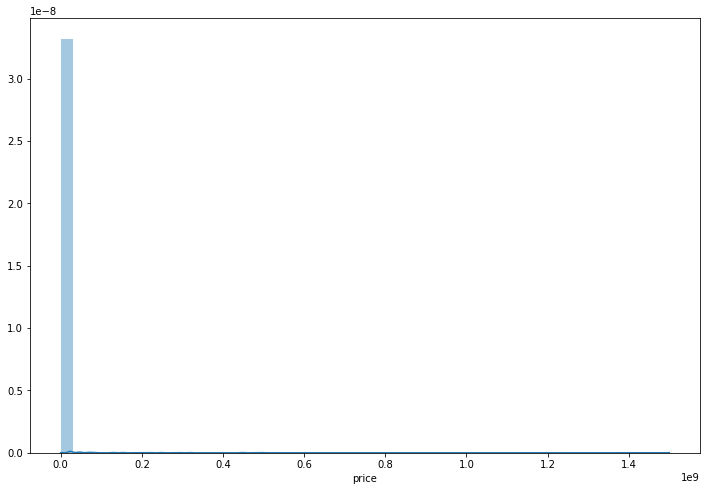

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(df_rental['price'])
plt.show()

<p> Summary statistics of numerical features</p>

In [21]:
df.describe()

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking
count,16117.000000,1.611700e+04,16117.000000,16117.000000,6089.000000,16117.000000,16117.000000,16117.000000,1.611700e+04
mean,8060.895328,2.262749e+07,2.265868,1.786809,3.175562,0.042750,0.051188,0.003971,5.221860e+04
std,4655.115101,7.391662e+07,9.966560,2.292134,14.319435,0.202299,0.220388,0.062892,5.771765e+06
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4030.000000,1.000000e+05,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,8059.000000,3.000000e+06,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,12095.000000,1.750000e+07,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000e+00
max,16124.000000,3.000000e+09,1231.000000,100.000000,1101.000000,1.000000,1.000000,1.000000,7.231109e+08


<h2> Bivariate analysis</h2>
<h3>Pairplot visualisation</h3>

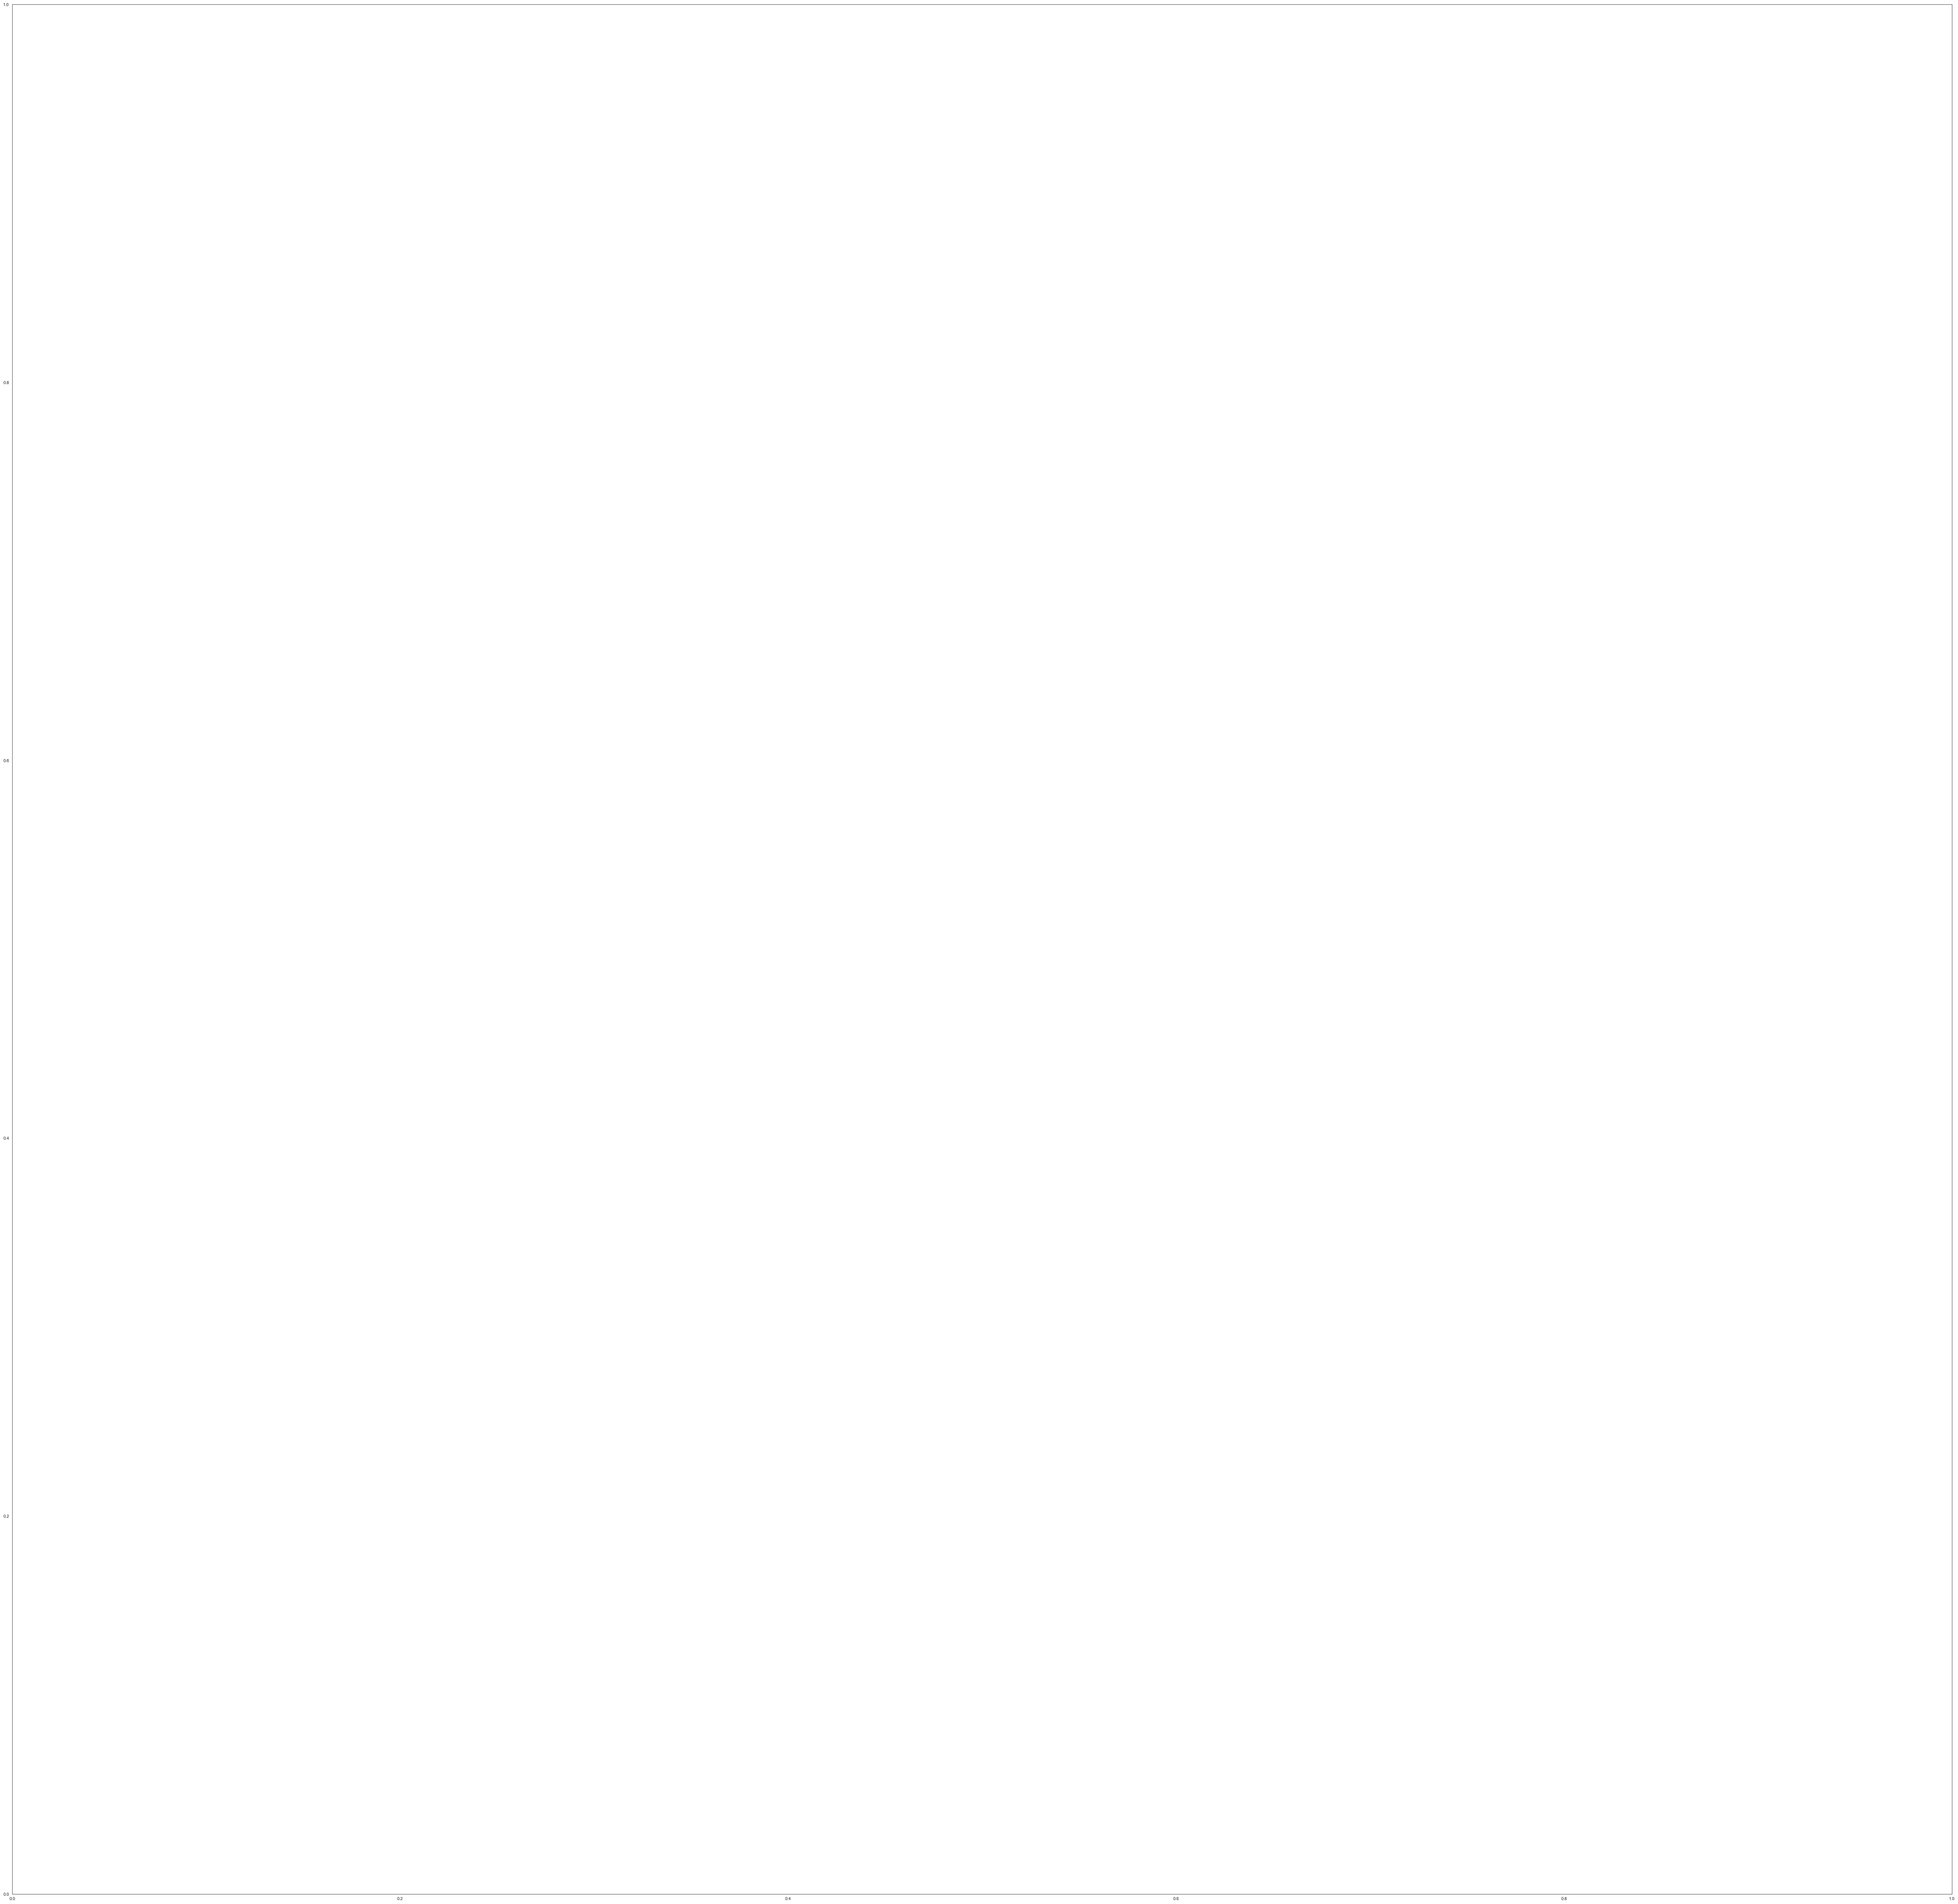

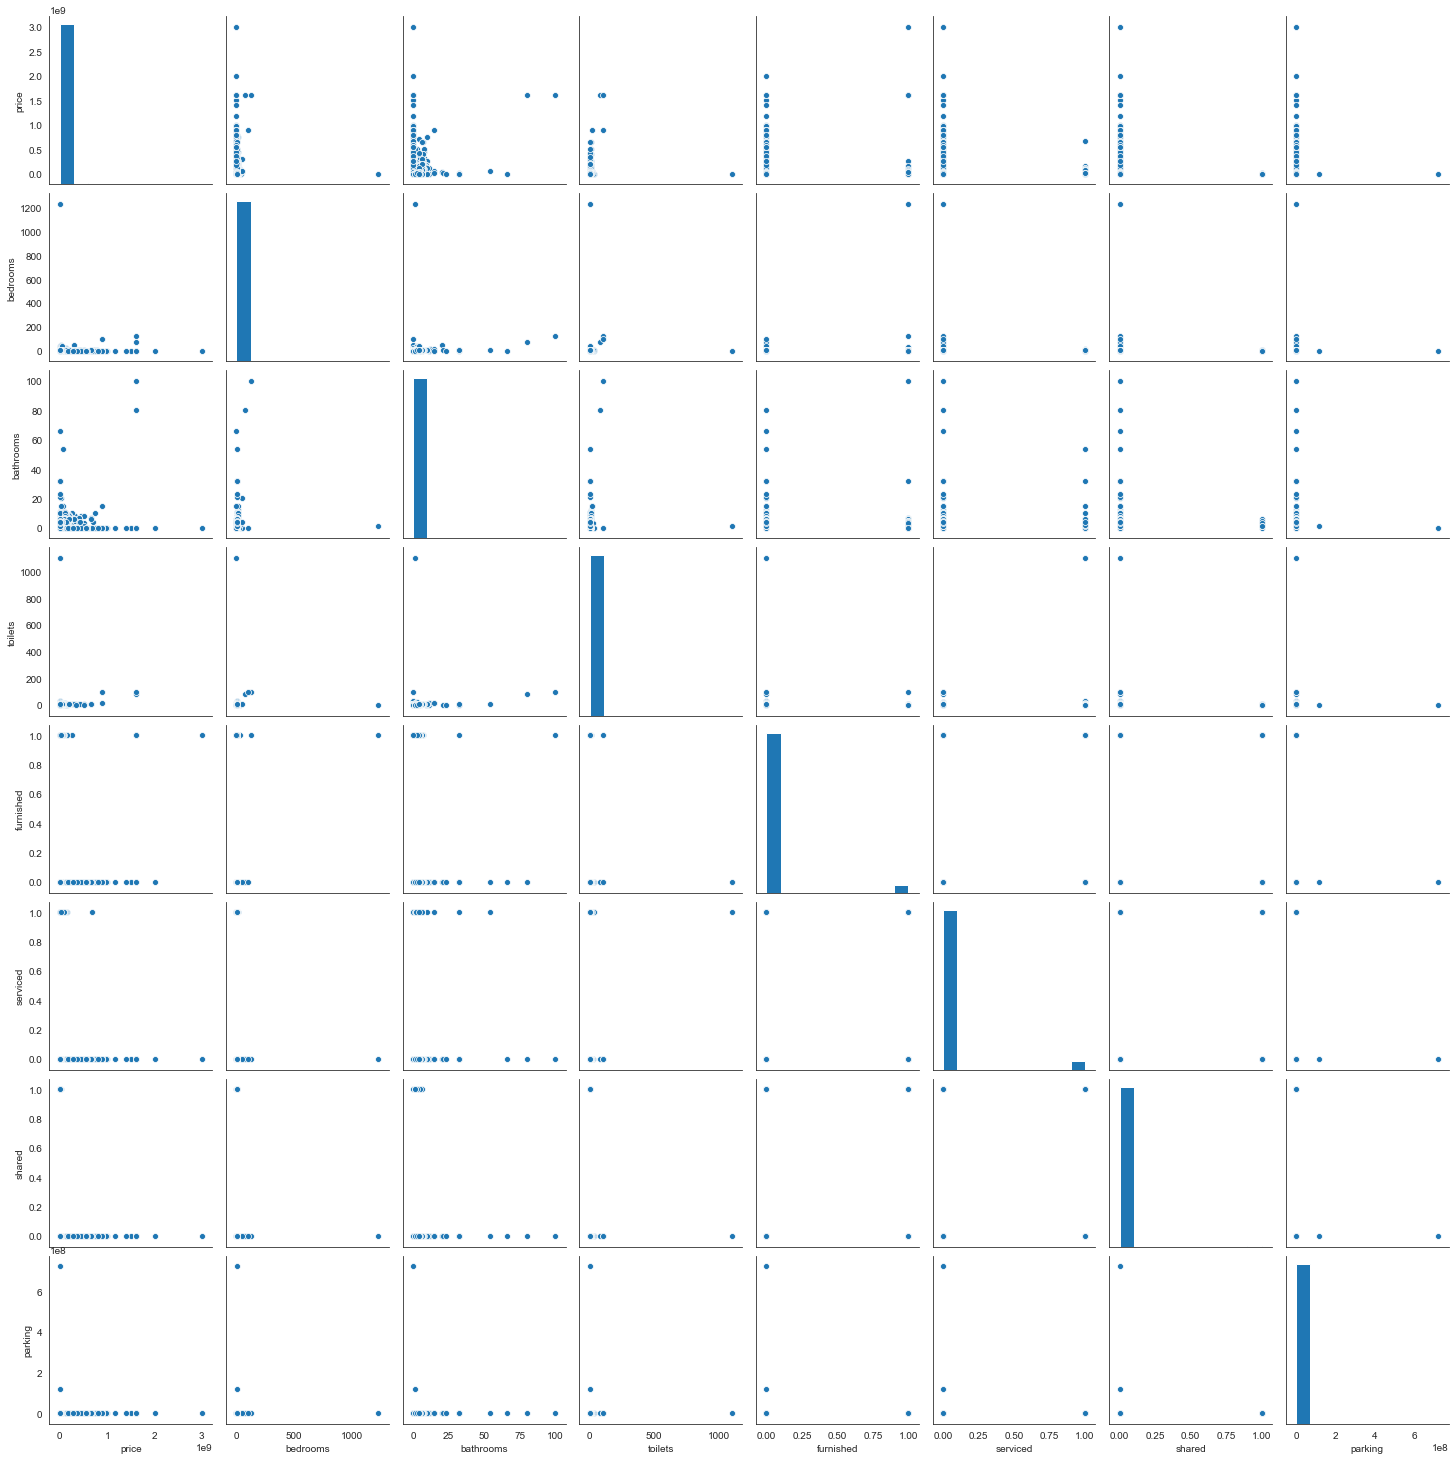

In [31]:
fig, ax = plt.subplots(figsize =(80,80))
sns.pairplot(df.loc[:, ~df.columns.isin(['id'])])
plt.show()
# Plot bar plot for each categorical feature

<h2>Visualization of spread</h2>
<h3>Segmentations</h3>
<p>In this section we get to observe relationships between categorical features and numeric features</p>
<h3>Segmentation between property type and price for sale propperties</h3>

In [18]:
df['date'] = pd.to_datetime(df['listdate'])

In [19]:
df['month'] = df['date'].apply(lambda date:date.month)

In [20]:
df['year'] = df['date'].apply(lambda date:date.year)

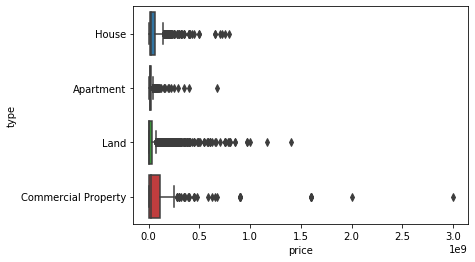

In [21]:
# sns.boxplot(x='listdate',y='price',data=df.loc[(df['category']=='For Sale')])
sns.boxplot(y='type', x='price', data=df.loc[(df['category']=='For Sale')])

In [34]:

df.loc[(df['category']=='For Rent')].loc[:, ~df.columns.isin(['id'])].groupby('type').agg([np.mean,np.std])

price                bedrooms             \
                              mean           std      mean        std   
type                                                                    
Apartment             4.101581e+05  4.578925e+06  2.199578   1.144197   
Commercial Property   1.424704e+06  1.962672e+07  0.117837   0.778755   
Event Centre / Venue  1.050075e+08  1.484818e+08  0.000000   0.000000   
House                 5.557466e+05  1.060348e+07  3.369838  23.340150   
Land                  4.848165e+07  2.295266e+08  0.000000   0.000000   

                     bathrooms             toilets            furnished  \
                          mean       std      mean        std      mean   
type                                                                      
Apartment             1.922699  1.439707  3.027445  29.196999  0.148981   
Commercial Property   0.122680  0.657597  2.704918   1.509352  0.012914   
Event Centre / Venue  0.000000  0.000000       NaN        NaN  0.000000   
House                 2.502334  2.236569  2.379270   1.536459  0.027289   
Land                  0.000000  0.000000       NaN        NaN  0.000000   

                                serviced              shared            \
                           std      mean       std      mean       std   
type                                                                     
Apartment             0.356132  0.115601  0.319802  0.019677  0.138911   
Commercial Property   0.112948  0.129944  0.336377  0.000807  0.028410   
Event Centre / Venue  0.000000  0.000000  0.000000  0.000000  0.000000   
House                 0.162954  0.026212  0.159793  0.001077  0.032809   
Land                  0.000000  0.000000  0.000000  0.000000  0.000000   

                            parking                
                               mean           std  
type                                               
Apartment              41621.856290  2.220397e+06  
Commercial Property        0.303471  1.752887e+00  
Event Centre / Venue       0.000000  0.000000e+00  
House                 259646.042011  1.370226e+07  
Land                       0.000000  0.000000e+00

<h3>Segmentation between property type and price for rental propperties</h3>

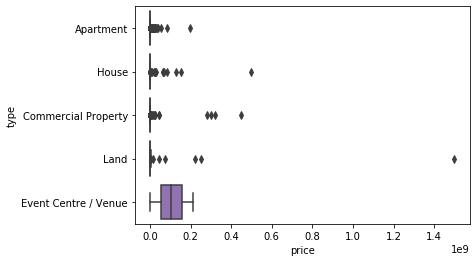

In [23]:
sns.boxplot(y='type', x='price', data=df.loc[(df['category']=='For Rent')])

In [24]:
df.loc[(df['category']=='For Rent')].groupby('type').agg([np.mean,np.std])

id                      price                \
                             mean          std          mean           std   
type                                                                         
Apartment             8129.222066  4721.046992  4.101581e+05  4.578925e+06   
Commercial Property   5544.467312  3235.898953  1.424704e+06  1.962672e+07   
Event Centre / Venue  7104.500000  2501.036685  1.050075e+08  1.484818e+08   
House                 9589.341472  4994.060384  5.557466e+05  1.060348e+07   
Land                  5633.840909  3585.674799  4.848165e+07  2.295266e+08   

                      bedrooms            bathrooms             toilets  \
                          mean        std      mean       std      mean   
type                                                                      
Apartment             2.199578   1.144197  1.922699  1.439707  3.027445   
Commercial Property   0.117837   0.778755  0.122680  0.657597  2.704918   
Event Centre / Venue  0.000000   0.000000  0.000000  0.000000       NaN   
House                 3.369838  23.340150  2.502334  2.236569  2.379270   
Land                  0.000000   0.000000  0.000000  0.000000       NaN   

                                 ...  serviced              shared            \
                            std  ...      mean       std      mean       std   
type                             ...                                           
Apartment             29.196999  ...  0.115601  0.319802  0.019677  0.138911   
Commercial Property    1.509352  ...  0.129944  0.336377  0.000807  0.028410   
Event Centre / Venue        NaN  ...  0.000000  0.000000  0.000000  0.000000   
House                  1.536459  ...  0.026212  0.159793  0.001077  0.032809   
Land                        NaN  ...  0.000000  0.000000  0.000000  0.000000   

                            parking                   month            \
                               mean           std      mean       std   
type                                                                    
Apartment              41621.856290  2.220397e+06  6.391075  2.885984   
Commercial Property        0.303471  1.752887e+00  7.361582  1.392343   
Event Centre / Venue       0.000000  0.000000e+00  7.000000  1.414214   
House                 259646.042011  1.370226e+07  5.559785  3.255869   
Land                       0.000000  0.000000e+00  6.750000  1.818829   

                             year            
                             mean       std  
type                                         
Apartment             2020.799719  0.830829  
Commercial Property   2020.184019  0.517890  
Event Centre / Venue  2020.500000  0.707107  
House                 2021.107720  0.888481  
Land                  2020.340909  0.607824  

[5 rows x 22 columns]

<h2>Comparison of average price over the years</h2>
<h3>1. Rental prices</h3>

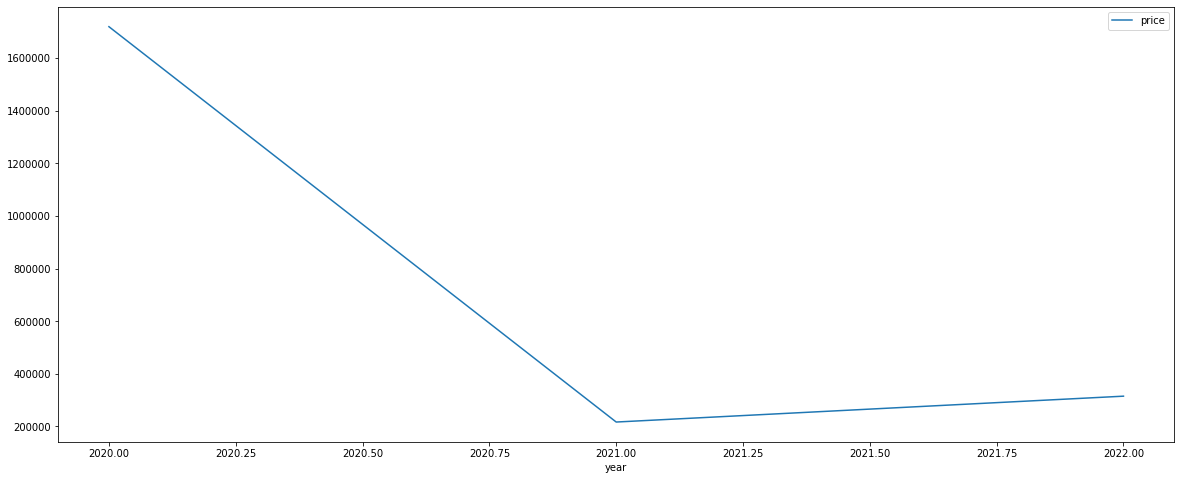

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot(
    data=df.loc[(df['category']=='For Rent')].groupby('year')['price'].mean().to_frame(),  # or .reset_index()
)
plt.show()

<h3>2. Sale price</h3>

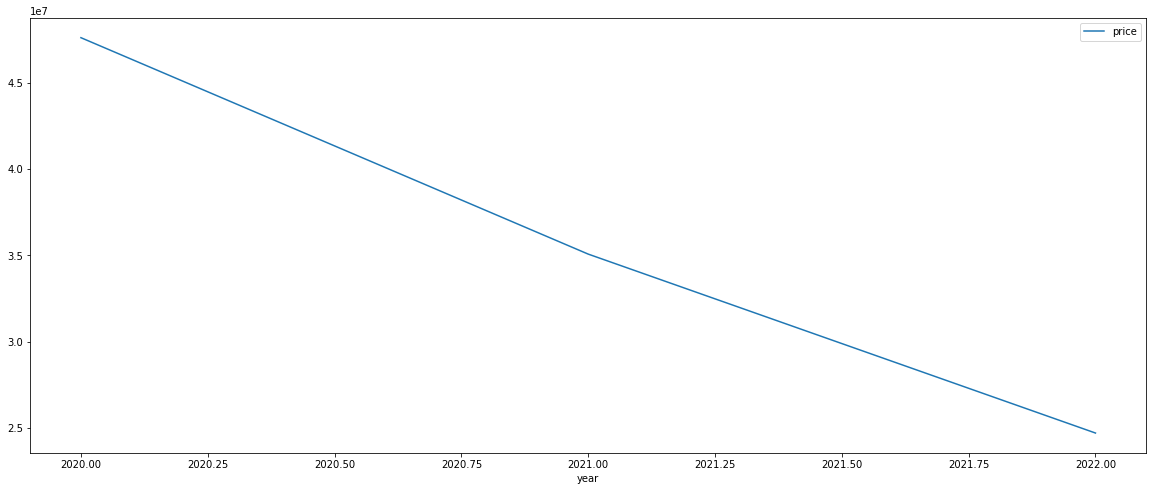

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(
    data=df.loc[(df['category']=='For Sale')].groupby('year')['price'].mean().to_frame(),  # or .reset_index()
)

plt.show()

<h2>Comparison of average price across one calender year</h2>
<h3>1. Rental prices</h3>

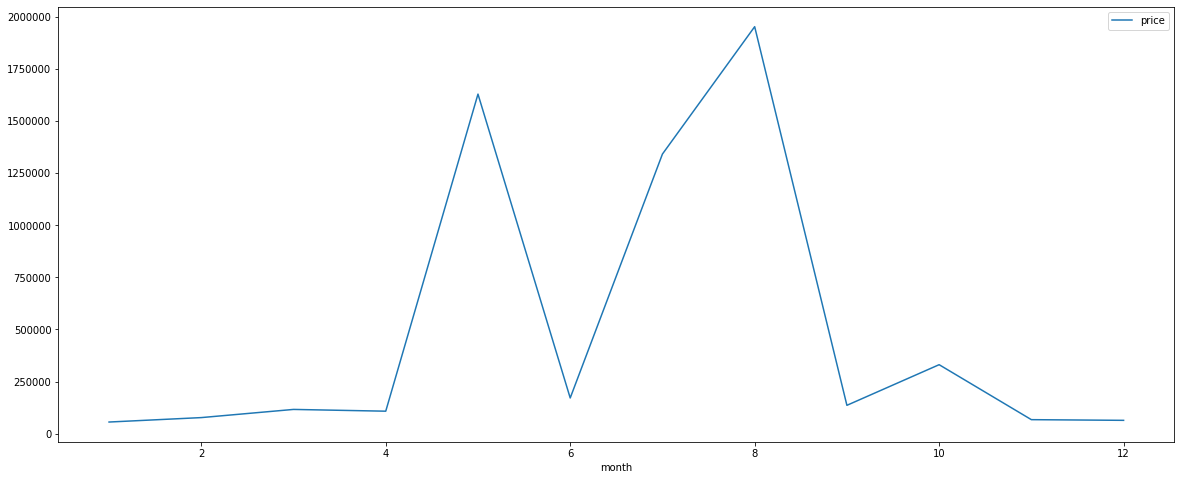

In [27]:
plt.figure(figsize=(20,8))
sns.lineplot(
    data=df.loc[(df['category']=='For Rent')].groupby('month')['price'].mean().to_frame(),  # or .reset_index()
)
plt.show()

<h3>2. Sale prices</h3>

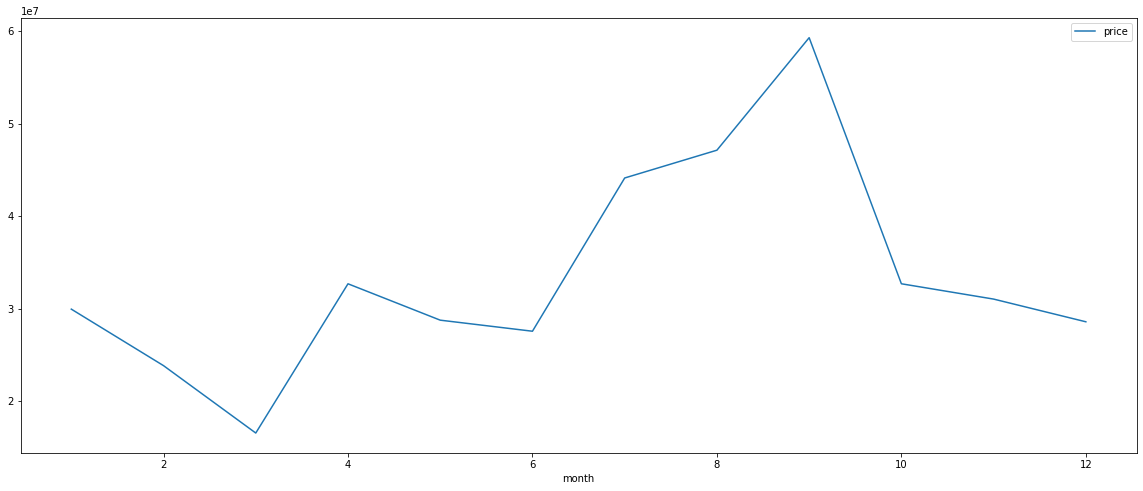

In [28]:
plt.figure(figsize=(20,8))
sns.lineplot(
    data=df.loc[(df['category']=='For Sale')].groupby('month')['price'].mean().to_frame(),  # or .reset_index()
)

plt.show()

<h2>Number of house listings change over the years</h2>

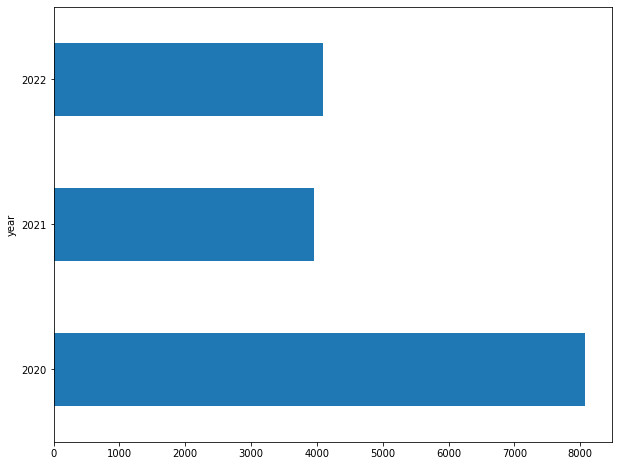

In [29]:
fig,ax = plt.subplots(figsize=(10,8))
grouped=df.groupby('year').size().plot(kind='barh',ax=ax)

<h2>Multivariate analysis</h2>
<p>Here we look at relationships between numeric features and other numeric features</p>
<h3>Correlations in the dataset properties<i>(both rental and sale)</i></h3>

In [30]:
correlations = df.corr()

In [31]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

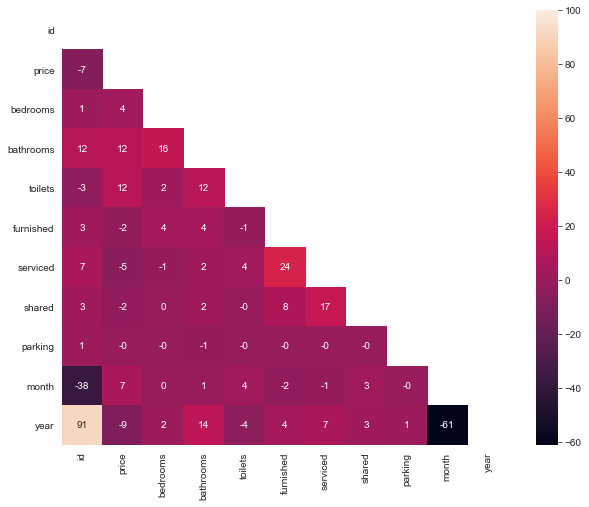

In [32]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

<h3>Correlations in the rental properties</h3>

In [33]:
rental_correlations = df_rental.loc[:, ~df_rental.columns.isin(['id'])].corr()

In [34]:
rental_mask = np.zeros_like(rental_correlations, dtype=np.bool)
rental_mask[np.triu_indices_from(rental_mask)] = True

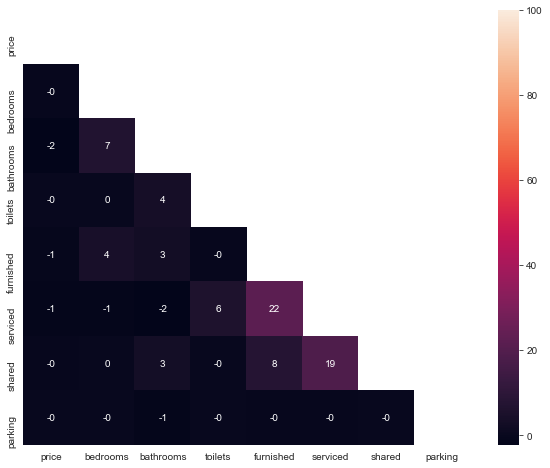

In [35]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.heatmap(rental_correlations*100, annot=True, fmt ='.0f', mask=rental_mask)

<h3>Correlations in properties listed for sale</h3>

In [26]:
sale_correlations = df_sale.loc[:, ~df_sale.columns.isin(['id'])].corr()

In [28]:
sale_mask = np.zeros_like(sale_correlations, dtype=np.bool)
sale_mask[np.triu_indices_from(sale_mask)] = True

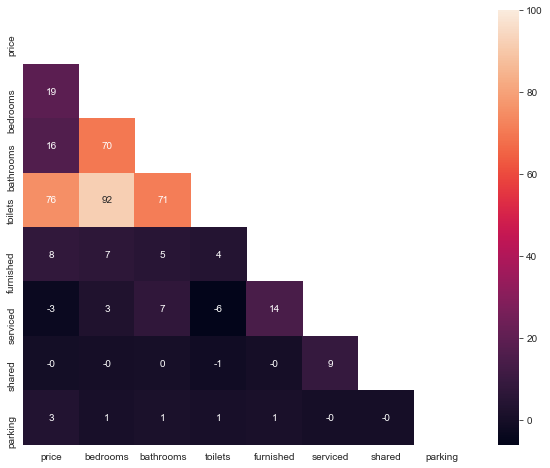

In [29]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.heatmap(sale_correlations*100, annot=True, fmt ='.0f', mask=sale_mask)